# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     |  Ernesto Andrés González Lomelí |
| **Fecha**      | 06/03/2025  |
| **Expediente** | 746843  | 

In machine learning, Support Vector Machines (SVM) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. It is mostly used in classification problems. In this algorithm, each data item is plotted as a point in p-dimensional space (where p is the number of features), with the value of each feature being the value of a particular coordinate. Then, classification is performed by finding the hyper-plane that best differentiates the two classes (or more if we have a multi class problem):

$$ f(x) = w^T \varphi(x) + b $$

where $\varphi: X \rightarrow F $ is a function that makes each input point $x$ correspond to a point in F, where F is a Hilbert space.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification, implicitly mapping their inputs into high-dimensional feature spaces (more specifically using the kernel trick, like the RBF funcion). 

[1]

OLS utilizes the squared residuals to fit the parameters. Large residuals caused by outliers may worsen the accuracy significantly.

Support Vectors use piecewise linear functions to counter this, in which a hyperparameter  $\epsilon$ called the margin lets errors that are less or equal to it be 0, and error larger than it be $e - \epsilon$. 

The problem to solve is:

\begin{split}
        \min_{w, b, \xi, \xi^*} \mathcal{P}_\epsilon(w, b, \xi) &= \frac{1}{2} w^T w + c \sum_{k=1}^{N} \xi_k \\
        \text{s.t. } & y_k [w^T \varphi(x_k) - b] \geq 1- \xi_k,\ \ k = 1, ..., N \\
        & \xi_k \geq 0,\ \ k = 1, ..., N
\end{split}


The most important question that arises when using a SVM is how to choose the correct hyperplane. Consider the following scenarios:

### Scenario 1

In this scenario there are three hyperplanes called A, B, and C. Now, the problem is to identify the hyperplane which best differentiates the stars and the circles.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/SVM_21-2.png" alt="what image shows"></center>

In this case, hyperplane B separates the stars and the circle betters, hence it is the correct hyperplane.


### Scenario 2

Now take another scenario where all three hyperplanes are segregating classes well. The question that arises is how to choose the best hyperplane in this situation.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/SVM_4-2.png" alt="what image shows"></center>

In such scenarios, we calculate the margin (which is the distance between nearest data point and the hyperplane). The hyperplane with the largest margin will be considered as the correct hyperplane to classify the dataset.

Here C has the largest margin. Hence, it is considered as the best hyperplane.


### Kernels
Knowing 
$$ w = \sum_{k=1}^{N} \alpha_k y_k \varphi(x_k) $$

And
$$ y_{pred} = w^T \varphi(x) + b $$

Then 
$$ y_{pred} = (\sum_{k=1}^{N} \alpha_k y_k \varphi(x_k))^T \varphi(x) + b $$

Where $\varphi$ is a function that makes each input in $x$ correspond to a point in $F$ (a Hilbert space). This can be seen as processing and transforming the input featuers to keep the model's convexity. [2]

This also allows us to transform the inputs into another space where they might be more easily classified.

<center><img src=https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png alt="what image shows"></center>

## ROC and AUC

A ROC (Receiver Operating Characteristic) is a graph that shows how the classification model performs at the classification thresholds. 

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better. [3]

True Positive Rate is a synonym for Recall and defined as:
$$ TPR = \frac{TP}{TP + FN} $$

False Positive Rate is a synonym for Specificity and defined as:

$$ FPR = \frac{FP}{FP + TN} $$

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

E.g. If you lower a classification threshold, more items would be classified as positive, increasing False Positives and True Positives.

AUC stands for Area under the ROC.

## Ejercicio 1

- Utiliza el dataset `Iris`, modela con SVC y haz Cross-Validation de diferentes kernels ('linear', 'poly', 'rbf', 'sigmoid').
- Modela con LogisticRegression.
- El método de Cross-Validation es K-Folds con $k=10$.
- Utiliza el AUC como métrico de Cross-Validation.
- Compara resultados.

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

In [8]:
iris=load_iris()

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
x_df = pd.DataFrame(iris.data, columns=iris.feature_names)
x_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
num_features=x_df.columns
num_transformer=StandardScaler()

In [14]:
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features )])

In [15]:
model=SVC(probability=True)

In [16]:
SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
X=iris.data
y=iris.target
y=iris.target_names[y]

In [19]:
#Crear Pipline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', model)
])

In [20]:
pipeline.fit(x_df,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object'))])),
                ('model', SVC(probability=True))])

In [21]:
#En este caso nos sale la probabilidad de que sea 0,1 o que sea 2. porque nuestro target tiene 3 posibles resultados
y_score=pipeline.predict_proba(x_df)
y_score

array([[0.97976036, 0.0114352 , 0.00880443],
       [0.97241408, 0.01814538, 0.00944054],
       [0.97849956, 0.01200184, 0.0094986 ],
       [0.97442376, 0.01538244, 0.0101938 ],
       [0.97887871, 0.01179342, 0.00932788],
       [0.97333794, 0.01696438, 0.00969768],
       [0.97503379, 0.01366055, 0.01130566],
       [0.97966621, 0.01154639, 0.00878739],
       [0.96552051, 0.02257934, 0.01190015],
       [0.97626062, 0.01415734, 0.00958204],
       [0.97581585, 0.01453502, 0.00964913],
       [0.97813845, 0.01224039, 0.00962116],
       [0.97478657, 0.01560306, 0.00961038],
       [0.96843403, 0.0171127 , 0.01445327],
       [0.96403917, 0.02144565, 0.01451519],
       [0.95802444, 0.02334456, 0.01863099],
       [0.97507034, 0.01510923, 0.00982043],
       [0.97942732, 0.01203075, 0.00854193],
       [0.96596655, 0.02223862, 0.01179483],
       [0.97637358, 0.01393606, 0.00969035],
       [0.97061467, 0.01823381, 0.01115153],
       [0.97692311, 0.01404661, 0.00903029],
       [0.

In [22]:
from sklearn.preprocessing import LabelBinarizer

In [23]:
lb=LabelBinarizer()
y_onehot=lb.fit_transform(y)
y_onehot

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np

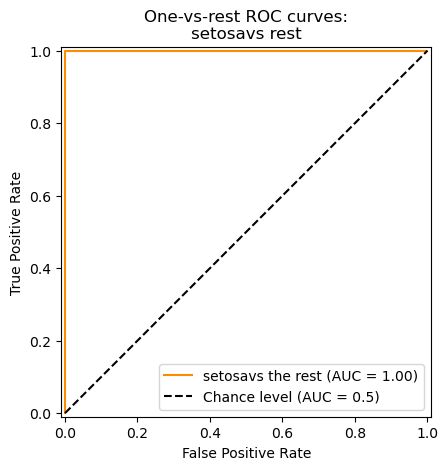

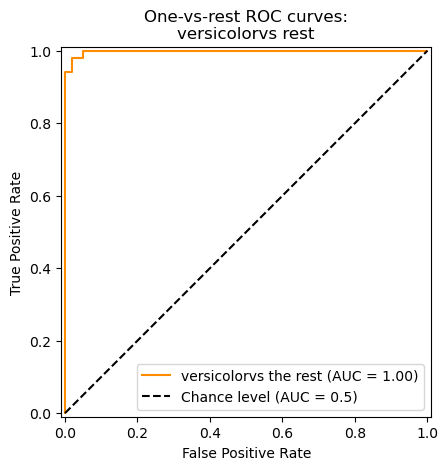

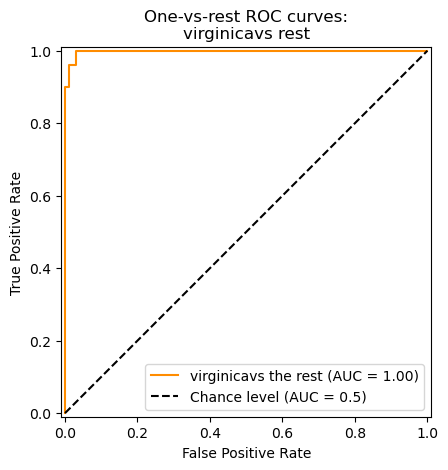

In [25]:
classes=['setosa', 'versicolor', 'virginica']
for class_of_interest in classes:
    class_id= np.flatnonzero(lb.classes_==class_of_interest)[0]
    display=RocCurveDisplay.from_predictions(
        y_onehot[:,class_id],
        y_score[:,class_id],
        name=f"{class_of_interest}vs the rest",
        color="darkorange",
        plot_chance_level=True
    )
    _=display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One-vs-rest ROC curves:\n"+ class_of_interest + "vs rest",
    )

In [26]:
from sklearn.model_selection import cross_val_score
k=10
scores=cross_val_score(pipeline,x_df,y,scoring='roc_auc_ovr',cv=k)
auc=scores


In [27]:
auc_mean=np.mean(auc)
auc_mean

0.9973333333333333

In [28]:
std_auc=np.std(auc)
std_auc

0.008000000000000018

In [29]:
from sklearn.linear_model import LogisticRegression
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
models = []
for kernel in kernels : models.append(SVC(kernel=kernel, probability=True))
models.append(LogisticRegression())
results = {}

In [30]:
for model in models :
    
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, x_df, y, scoring='roc_auc_ovr', cv=10)
    
    results[str(model)] = {
        'mean_auc': np.mean(scores),
        'std_auc': np.std(scores)
    }

In [31]:
results

{"SVC(kernel='linear', probability=True)": {'mean_auc': 0.9973333333333333,
  'std_auc': 0.008000000000000018},
 "SVC(kernel='poly', probability=True)": {'mean_auc': 0.9973333333333333,
  'std_auc': 0.005333333333333324},
 "SVC(kernel='sigmoid', probability=True)": {'mean_auc': 0.976,
  'std_auc': 0.030868898407440577},
 'SVC(probability=True)': {'mean_auc': 0.9973333333333333,
  'std_auc': 0.008000000000000018},
 'LogisticRegression()': {'mean_auc': 0.9973333333333333,
  'std_auc': 0.008000000000000018}}

In [32]:
results_df = pd.DataFrame(results).T
results_df

,mean_auc,std_auc
"SVC(kernel='linear', probability=True)",0.997333,0.008000
"SVC(kernel='poly', probability=True)",0.997333,0.005333
"SVC(kernel='sigmoid', probability=True)",0.976000,0.030869
SVC(probability=True),0.997333,0.008000
LogisticRegression(),0.997333,0.008000


## Ejercicio 2
- Repite el ejercicio 1 con el dataset `Default`. Utiliza `default` como target.

In [39]:
import pandas as pd

In [40]:
data=pd.read_csv('Default.csv')
data

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880
...,...,...,...,...
9995,No,No,711.555020,52992.378910
9996,No,No,757.962918,19660.721770
9997,No,No,845.411989,58636.156980
9998,No,No,1569.009053,36669.112360


In [41]:
data['default'] = (data['default'] == 'Yes').astype(int)
data['student'] = (data['student'] == 'Yes').astype(int)


In [42]:
X = data[['balance', 'income', 'student']]
y = data['default']

In [43]:
num_features = ['balance', 'income', 'student']
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features)])

In [45]:
model=SVC(probability=True)

In [46]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', model)
])

In [47]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['balance', 'income',
                                                   'student'])])),
                ('model', SVC(probability=True))])

In [48]:
y_score = pipeline.predict_proba(X)[:, 1]

In [49]:
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)

[Text(0.5, 0, 'False Positive Rate'),
 Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 1.0, 'ROC Curve')]

<Figure size 600x600 with 0 Axes>

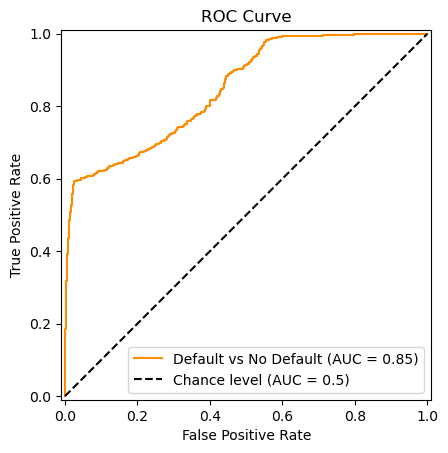

In [54]:
plt.figure(figsize=(6, 6))
display = RocCurveDisplay.from_predictions(y, y_score, name="Default vs No Default", color="darkorange" ,plot_chance_level=True)
display.ax_.set(xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve")

In [55]:
#AUC
k = 10
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=k)
auc_mean = np.mean(scores)
std_auc = np.std(scores)

In [57]:
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
models = [SVC(kernel=kernel, probability=True) for kernel in kernels]
models.append(LogisticRegression())
results = {}

In [58]:
for model in models :
    
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc_ovr', cv=10)
    
    results[str(model)] = {
        'mean_auc': np.mean(scores),
        'std_auc': np.std(scores)
    }

In [60]:
results_df = pd.DataFrame(results).T
results_df

,mean_auc,std_auc
"SVC(kernel='linear', probability=True)",0.746473,0.338750
"SVC(kernel='poly', probability=True)",0.871810,0.026480
"SVC(kernel='sigmoid', probability=True)",0.747224,0.049209
SVC(probability=True),0.839826,0.028840
LogisticRegression(),0.949877,0.013322


### Conclusiones
Nos dice que el modelo de LogisticRegression es el mejor con un AUC promedio de 0.949 y una desviación estandar muy baja de 0.013, es decir que la relación entre nuestra X y Nuestra Y(Default) se puede capturar bien con un modelo lineal.

Los otros dos que seguirían como modelos aceptables serían Poly y rbf.

Los que no son buenos son linear y sigmod.

# Addendum

Métricos disponibles para clasificación:
- ‘accuracy’
- ‘balanced_accuracy’
- ‘top_k_accuracy’
- ‘average_precision’
- ‘neg_brier_score’
- ‘f1’
- ‘f1_micro’
- ‘f1_macro’
- ‘f1_weighted’
- ‘f1_samples’
- ‘neg_log_loss’
- ‘precision’ etc.
- ‘recall’ etc.
- ‘jaccard’ etc.
- ‘roc_auc’
- ‘roc_auc_ovr’
- ‘roc_auc_ovo’
- ‘roc_auc_ovr_weighted’
- ‘roc_auc_ovo_weighted’
- ‘d2_log_loss_score’

# References

[1] Shigeo Abe.Support Vector Machines for Pattern Classification,2Ed.Springer-Verlag London,2010. ISBN978-1-84996-097-7. URLhttps://www.springer.com/gp/book/9781849960977.

[2] Johan A K Suykens, Tony Van Gestel, Jos De Brabanter, BartDe Moor, and Joos Vandewalle.Least Squares Support VectorMachines. World Scientific,2002. ISBN9789812381514. URLhttps://www.worldscientific.com/worldscibooks/10.1142/5089.

[3] Bradley, A. P. (1997). The use of the area under the ROC curve in the evaluation of machine learning algorithms. Pattern recognition, 30(7), 1145-1159. URL https://www.researchgate.net/post/how_can_I_interpret_the_ROC_curve_result